ИУ5-53Б Лупарев РК1 Вар. 14

In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.columns = df.columns.str.strip()
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [52]:
print(df.isnull().sum()) # пропусков нет

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Так как мы выяснили, что пропусков нет, то создадим 5% пропусков искусственно. Также сделаем University Raing категориальным

In [53]:
rating_map = {
    1: 'Very Bad',
    2: 'Bad',
    3: 'Normal',
    4: 'Good',
    5: 'Excellent'
}
df['University Rating'] = df['University Rating'].map(rating_map)
for col in ['GRE Score', 'University Rating']:
     missing_indices = df.sample(frac=0.05, random_state=52).index
     df.loc[missing_indices, col] = np.nan

In [54]:
df.info() #проверячем создание пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          475 non-null    float64
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  475 non-null    object 
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 35.3+ KB


In [55]:
# Заменим пропуски в GRE Score усеченным средним
q_05 = df['GRE Score'].dropna().quantile(0.05)
q_95 = df['GRE Score'].dropna().quantile(0.95)
print(f"5-й перцентиль (q_05): {q_05}")
print(f"95-й перцентиль (q_95): {q_95}")
filtr_data = df[(df['GRE Score'] > q_05) & (df['GRE Score'] < q_95)]['GRE Score']
print(f"Количество значений между 5% и 95% квантилями: {len(filtr_data)}")
filtr_data_mean = filtr_data.mean()
print(f"Отсеченное среднее для GRE Score: {filtr_data_mean}")
df['GRE Score'] = df['GRE Score'].fillna(filtr_data_mean)

# Заменим пропуски в University Rating модой
mode_rating = df['University Rating'].mode()[0]
print(f"Мода для University Rating: {mode_rating}")
df['University Rating'] = df['University Rating'].fillna(mode_rating)

5-й перцентиль (q_05): 298.0
95-й перцентиль (q_95): 335.0
Количество значений между 5% и 95% квантилями: 420
Отсеченное среднее для GRE Score: 316.48809523809524
Мода для University Rating: Normal


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    object 
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 35.3+ KB


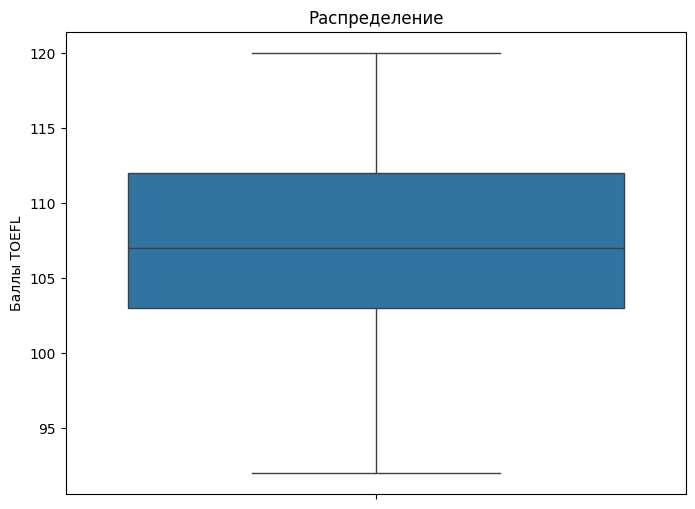

In [58]:
# Boxplot для TOEFL Score
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['TOEFL Score'])
plt.title('Распределение')
plt.ylabel('Баллы TOEFL')
plt.show()

Далее для построения моделей машинного обучения я буду использовать все признаки(после преобразования University Rating обратно в числовой). В столбцах признаков нет пропусков, они являются числовыми и согласно моему представлению о поступлении в магистратуру все эти признаки так или иначе имеют влияние на шанс поступления.